**1. Import necessary libraries**


In [264]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import  StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns



**2. Load the data**


In [265]:
df = pd.read_csv('customer_analysis.csv', sep='\t', index_col=0)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0




**3. Data Cleaning and Preparation**


In [266]:
# replace Dt_Customer with a datetime column
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
# replace null values of Income column with mean
df['Income'].fillna(df['Income'].mean(), inplace=True)
# Farewell to Redundancy
df = df.drop(columns=['Z_CostContact', 'Z_Revenue'])
df.isna().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64



**4. Feature Engineering**


In [267]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [268]:
# Age Extraction
current_year = pd.to_datetime('today').year
df['Age'] = current_year - df['Year_Birth']
df.drop('Year_Birth', axis=1, inplace=True)

In [269]:
# Spending Power
df['TotalSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [270]:
# Family Dynamics
df['Children'] = df['Kidhome'] + df['Teenhome']
df.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True)

In [271]:
# Family Size
marital_mapping = {
    "Married": 2,
    "Together": 2,
    "Divorced": 1,
    "Single": 1,
    "Widow": 1,
    "Alone": 1,
    "Absurd": 1,
    "YOLO": 1
}
df['familySize'] = df['Marital_Status'].map(marital_mapping) + df['Children']

In [272]:
# Household Living Arrangement
living_mapping = {
    "Married": 0,
    "Together": 0,
    "Divorced": 1,
    "Single": 1,
    "Widow": 1,
    "Alone": 2,
    "Absurd": 2,
    "YOLO": 2
}
df['Marital_Status'] = df['Marital_Status'].map(living_mapping)

In [273]:
# Family Unity
df['Family_Size'] = df['Children'] + df['Marital_Status'].apply(lambda x: 2 if x == 0 else 1)

In [274]:
# Parental Status
df['Is_Parent'] = df['Children'].apply(lambda x: 1 if x > 0 else 0)

In [275]:
# Educational Evolution
education_mapping = {
    "Basic": 0,
    "2n Cycle": 1,
    "Graduation": 1,
    "Master": 2,
    "PhD": 2
}
df['Education'] = df['Education'].map(education_mapping)



**5. Data Preparation**


In [276]:
#change Dt_Customer to EnrollDate, EnrollMonth, EnrollYear for scaling
df['EnrollDate'] = df['Dt_Customer'].dt.day
df['EnrollMonth'] = df['Dt_Customer'].dt.month
df['EnrollYear'] = df['Dt_Customer'].dt.year
df.drop('Dt_Customer', axis=1, inplace=True)

In [277]:
#scale dataset
scaler = StandardScaler()
scaler.fit(df)

df_scaled = pd.DataFrame(scaler.transform(df), columns=df.columns, index=df.index)
df_scaled.head()


,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Response,Age,TotalSpent,Children,familySize,Family_Size,Is_Parent,EnrollDate,EnrollMonth,EnrollYear
ID,,,,,,,,,,,,,,,,,,,,,
5524,-0.678980,1.319921,0.235327,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,...,2.388846,0.985345,1.679417,-1.264505,-1.759115,-1.759115,-1.584605,-1.324242,0.726520,-1.502225
2174,-0.678980,1.319921,-0.235826,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,...,-0.418612,1.235733,-0.961275,1.396361,0.446548,0.446548,0.631072,-0.869113,-0.994691,1.420036
4141,-0.678980,-0.737576,0.773633,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,...,-0.418612,0.317643,0.282673,-1.264505,-0.656283,-0.656283,-1.584605,0.610056,0.439652,-0.041094
6182,-0.678980,-0.737576,-1.022732,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,...,-0.418612,-1.268149,-0.918094,0.065928,0.446548,0.446548,0.631072,-0.641549,-1.281560,1.420036
5324,1.217422,-0.737576,0.241519,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,...,-0.418612,-1.017761,-0.305254,0.065928,0.446548,0.446548,0.631072,0.382491,-1.568428,1.420036


In [278]:
print(df_scaled.max())

Education               1.217422
Marital_Status          3.377418
Income                 24.545128
Recency                 1.722981
MntWines                3.533390
MntFruits               4.343008
MntMeatProducts         6.904261
MntFishProducts         4.055064
MntSweetProducts        5.716737
MntGoldProds            6.096698
NumDealsPurchases       6.561217
NumWebPurchases         8.248526
NumCatalogPurchases     8.670110
NumStorePurchases       2.218248
NumWebVisitsMonth       6.052291
AcceptedCmp3            3.569640
AcceptedCmp4            3.523233
AcceptedCmp5            3.569640
AcceptedCmp1            3.815174
AcceptedCmp2            8.582929
Complain               10.279429
Response                2.388846
Age                     6.326960
TotalSpent              3.187435
Children                2.726794
familySize              2.652211
Family_Size             2.652211
Is_Parent               0.631072
EnrollDate              1.747878
EnrollMonth             1.587126
EnrollYear



**6. Clustering**


c:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


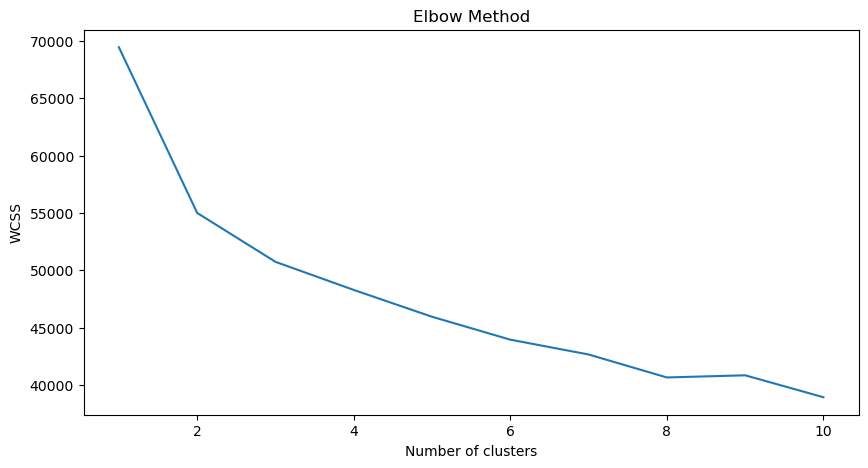

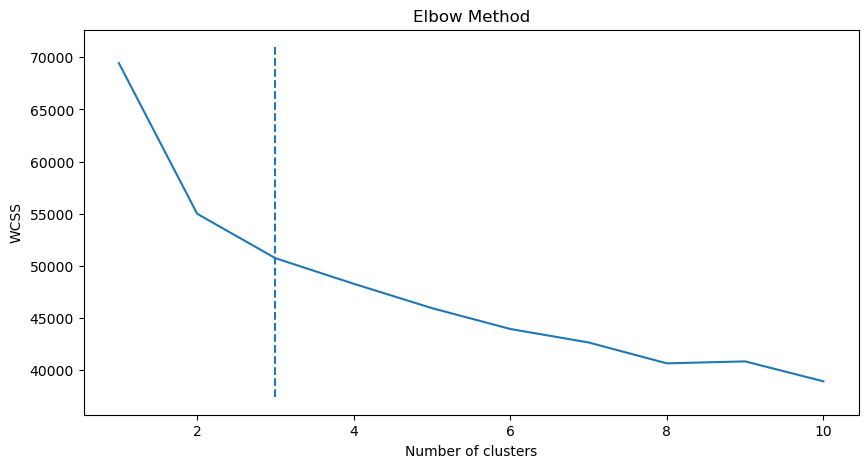

The optimal number of clusters is 3


In [279]:
from kneed import KneeLocator

# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Use KneeLocator to find the elbow point
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
elbow_point = kl.elbow

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.vlines(elbow_point, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

print(f"The optimal number of clusters is {elbow_point}")

# From the Elbow Curve, we can see that the optimal number of clusters is 3


In [280]:
# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
df_scaled['Clusters'] = agg_clustering.fit_predict(df_scaled)



**7. Visualization**


**Scatter Plot**


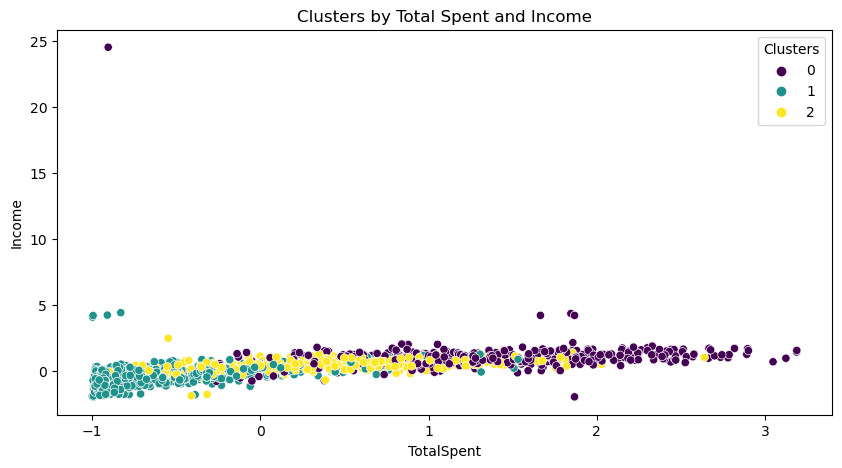

In [281]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_scaled['TotalSpent'], y=df_scaled['Income'], hue=df_scaled['Clusters'], palette='viridis')
plt.title('Clusters by Total Spent and Income')
plt.show()



**Swarmplot**


c:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 73.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 84.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 75.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


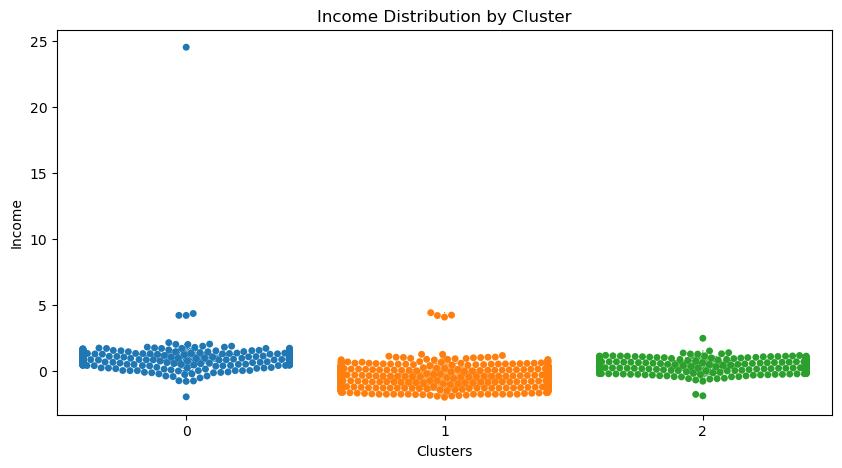

In [282]:
# Swarm Plot
plt.figure(figsize=(10, 5))
sns.swarmplot(x=df_scaled['Clusters'], y=df_scaled['Income'])
sns.swarmplot(x=df_scaled['Clusters'], y=df_scaled['Income'], size=1)
plt.title('Income Distribution by Cluster')
plt.show()



**Boxenplot**


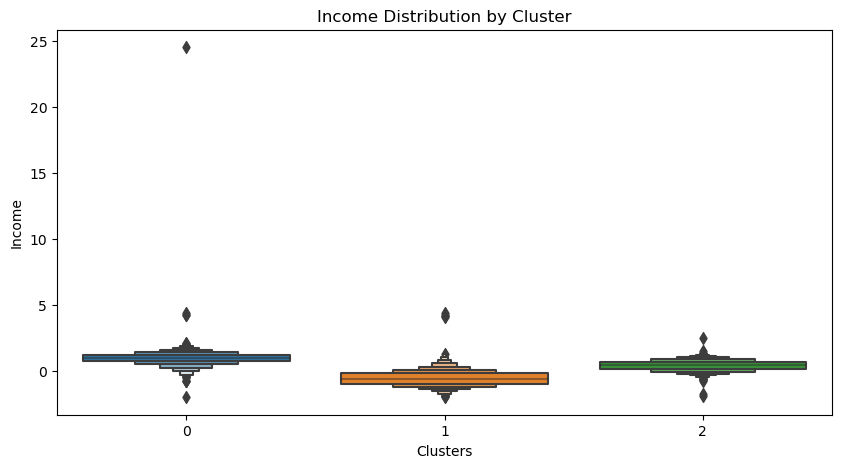

In [283]:
# Boxenplot
plt.figure(figsize=(10, 5))
sns.boxenplot(x=df_scaled['Clusters'], y=df_scaled['Income'])
plt.title('Income Distribution by Cluster')
plt.show()



**Distribution of Cluster Chart**


c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


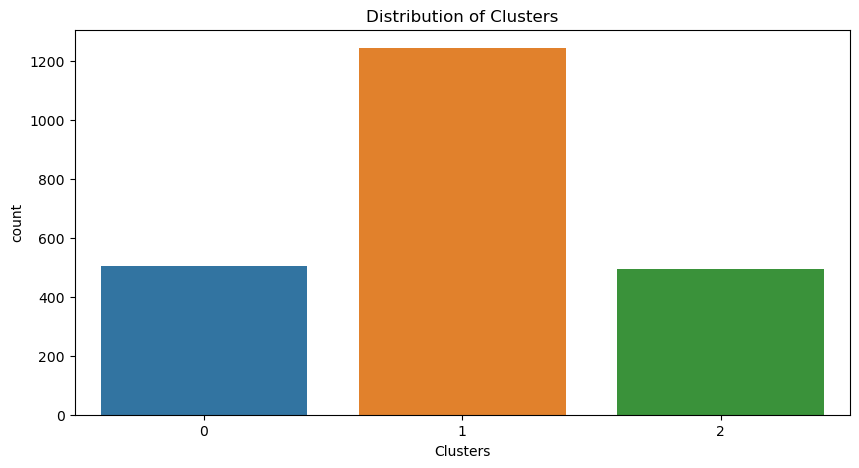

In [284]:
# Distribution of Clusters
plt.figure(figsize=(10, 5))
sns.countplot(df_scaled['Clusters'])
plt.title('Distribution of Clusters')
plt.show()



**Profiling between Income and Spending Cluster**


In [285]:
cluster_profile = df_scaled.groupby('Clusters').mean()
cluster_profile['Count'] = df_scaled['Clusters'].value_counts()
print(cluster_profile)

          Education  Marital_Status    Income   Recency  MntWines  MntFruits  \
Clusters                                                                       
0          0.056206        0.092786  1.003702  0.024647  0.990345   0.942225   
1         -0.081400       -0.042923 -0.559440 -0.023044 -0.613821  -0.467846   
2          0.148052        0.013640  0.387588  0.033000  0.538437   0.219191   

          MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Clusters                                                                     
0                1.362716         1.005368          0.891851      0.616748   
1               -0.548642        -0.465884         -0.453187     -0.380634   
2               -0.005954         0.149816          0.233598      0.331205   

          ...       Age  TotalSpent  Children  familySize  Family_Size  \
Clusters  ...                                                            
0         ...  0.030252    1.332208 -1.142835   -0.996122   

**8. Result**


Based on the results, we can conclude the following:

1. Cluster 0: This cluster has the highest mean income, total spent, and amount spent on various products (wine, fruits, meat, fish, sweet, gold products). The customers in this cluster are not parents and have the smallest family size. This cluster could represent high-spending customers who are likely single or without children.

2. Cluster 1: This cluster has the lowest mean income and total spent. They also spend the least on various products. The customers in this cluster are parents and have a larger family size compared to the other clusters. This cluster could represent lower-spending customers with families.

3. Cluster 2: This cluster is in between the other two clusters in terms of income and total spent. They spend a moderate amount on various products. The customers in this cluster are also parents and have a moderate family size. This cluster could represent moderate-spending customers with families.

These insights can be used to tailor marketing strategies for each cluster. For example, high-value promotions could be targeted at Cluster 0, while family-oriented promotions could be targeted at Clusters 1 and 2.